<h1>Handwritten digit classification</h1>

<p>This project uses Principal Component Analysis (PCA), implemented using Singular Value Decomposition (SVD) to reduce the data</p>

<h3>Dataset processing</h3>

<h5>Imports</h5>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

<h5>Load dataset from <b>semeion.data</b> file. There are 1593 images of handwritten numbers, each image on a diffrent line. Each image can be found in the first 256 columns (size of 16x16 pixels), and the last 10 columns represent the label vector: the actual handwritten digit coresponds to the index of the vector where the value is 1 (the rest are 0)</h5>
<p>The dataset was taken from <a href="https://archive.ics.uci.edu/dataset/178/semeion+handwritten+digit">here</a></p>

In [53]:
data = pd.read_csv("semeion.data", sep=" ", header=None)
data = data.dropna(axis=1)

data

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


<h5>Split the data in the actual images (first 256 columns) and the labels (last 10 columns)</h5>
<h5>The label vector for each of the rows is converted to a single value, which represents the index where the value is 1</h5>

In [54]:
data_numbers = data.iloc[:, :256]
data_labels = data.iloc[:, 256:]
# convert data labels to single number
data_labels = [np.where(r == 1)[0][0] for r in data_labels.values]

# convert data to numpy array
data_numbers = data_numbers.values
data_labels = np.array(data_labels)

print(f"Data shape: {data_numbers.shape}")
print(f"Labels shape: {data_labels.shape}")

Data shape: (1593, 256)
Labels shape: (1593,)


<h5>Sort data by labels, to have the all the handwritten digits in ascending order</h5>

In [55]:
# sort data by labels
idx = np.argsort(data_labels)
data_numbers = data_numbers[idx]
data_labels = data_labels[idx]

print("Number of images of each digit:")
for i in range(10):
    print(f"Number {i}: {np.sum(data_labels == i)}")

Number of images of each digit:
Number 0: 161
Number 1: 162
Number 2: 159
Number 3: 159
Number 4: 161
Number 5: 159
Number 6: 161
Number 7: 158
Number 8: 155
Number 9: 158


<h5>As we can see, there is not a constant amount of images for each digit, so the dataset is reduced to have the first 150 images of each digit</h5>

In [56]:
#Reduce the data so there are 150 instances of each number
data_numbers_reduced = []
data_labels_reduced = []

images_per_digit = 150
for i in range(10):
    data_numbers_reduced.append(data_numbers[data_labels == i][:images_per_digit])
    data_labels_reduced.append(data_labels[data_labels == i][:images_per_digit])
data_numbers_reduced = np.concatenate(data_numbers_reduced)
data_labels_reduced = np.concatenate(data_labels_reduced)

data_numbers = data_numbers_reduced
data_labels = data_labels_reduced

print("Number of images of each digit:")
for i in range(10):
    print(f"Number {i}: {np.sum(data_labels == i)}")


Number of images of each digit:
Number 0: 150
Number 1: 150
Number 2: 150
Number 3: 150
Number 4: 150
Number 5: 150
Number 6: 150
Number 7: 150
Number 8: 150
Number 9: 150


<h5>Plot first 10 images of each number</h5>

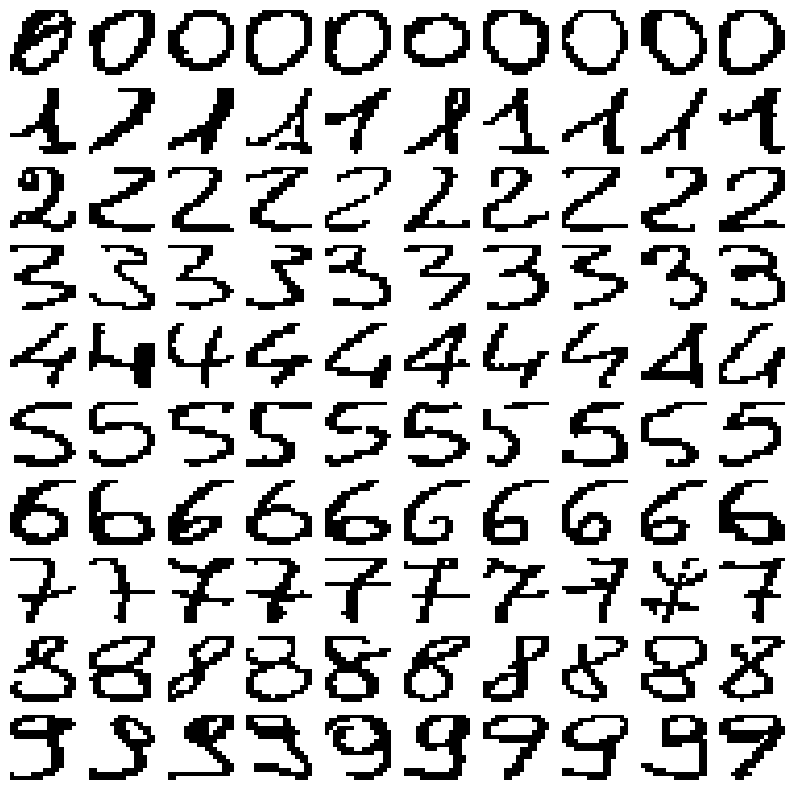

(1500, 256)
(1500,)


In [57]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(0, 10):
    images = data_numbers[data_labels == i][:10]
    for j in range(0, 10):
        axs[i, j].imshow(images[j].reshape(16, 16), cmap="binary")
        axs[i, j].axis("off")
plt.show()

print(data_numbers.shape)
print(data_labels.shape)

<h5>Split the data in train / test. The train data is set to 120 images of each digit, which represents 80% of the dataset.
The selected images for train data are random, and the rest were left for testing</h5>

In [58]:
data_numbers_train, data_numbers_test, data_labels_train, data_labels_test = train_test_split(data_numbers, data_labels, test_size=0.2, stratify=data_labels)

print("Number of instances of each number in train data:")
for i in range(10):
    print(f"Number {i}: {np.sum(data_labels_train == i)}")



Number of instances of each number in train data:
Number 0: 120
Number 1: 120
Number 2: 120
Number 3: 120
Number 4: 120
Number 5: 120
Number 6: 120
Number 7: 120
Number 8: 120
Number 9: 120


<h5>Plot the training data</h5>

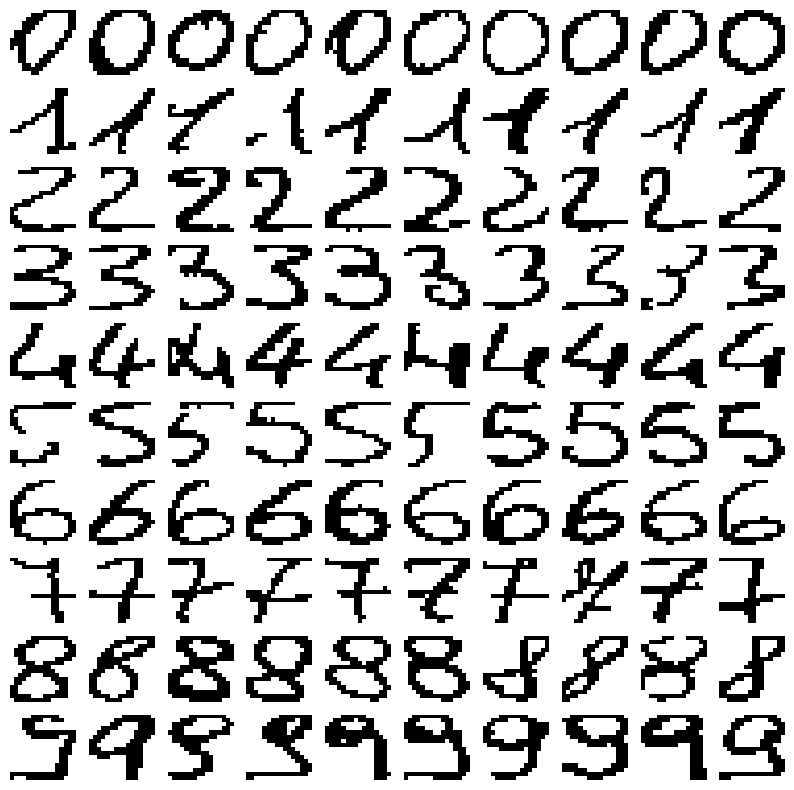

Train data shape: (1200, 256)
Train labels shape: (1200,)
Test data shape: (300, 256)
Test labels shape: (300,)


In [59]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(0, 10):
    instances = data_numbers_train[data_labels_train == i][:10]
    for j in range(0, 10):
        axs[i, j].imshow(instances[j].reshape(16, 16), cmap="binary")
        axs[i, j].axis("off")
plt.show()

print("Train data shape:", data_numbers_train.shape)
print("Train labels shape:", data_labels_train.shape)
print("Test data shape:", data_numbers_test.shape)
print("Test labels shape:", data_labels_test.shape)

<h2>Training</h2>

<h5>Calculate the SVD of the training data matrix</h5>

In [60]:
U, S, Vt = np.linalg.svd(data_numbers_train, full_matrices=True)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

U shape: (1200, 1200)
S shape: (256,)
Vt shape: (256, 256)


<h5>Plot the singular values</h5>

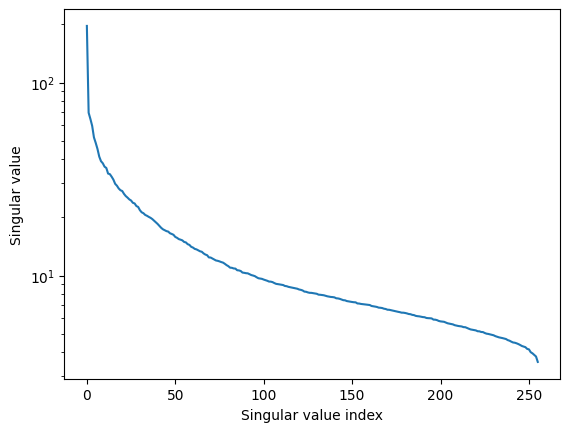

In [61]:
plt.semilogy(S)
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.show()


<h5>Plot the cumulative sum for each singular value. This shows the percentage of information that is stored by each singular value</h5>

(256,)


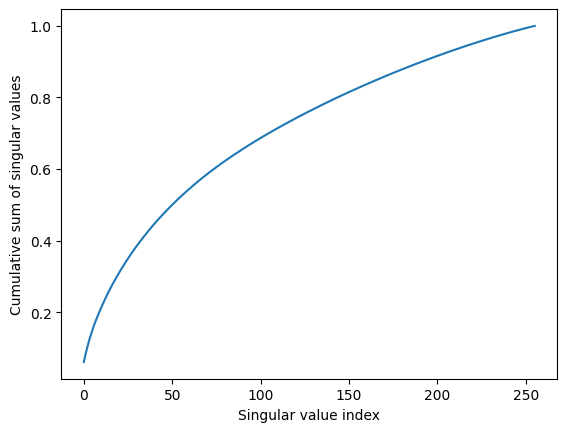

10 singular values explain 20.33% of the variance
20 singular values explain 30.22% of the variance
30 singular values explain 37.90% of the variance
40 singular values explain 44.19% of the variance
50 singular values explain 49.52% of the variance
60 singular values explain 54.19% of the variance
70 singular values explain 58.30% of the variance
80 singular values explain 61.98% of the variance
90 singular values explain 65.31% of the variance
100 singular values explain 68.40% of the variance
110 singular values explain 71.27% of the variance
120 singular values explain 73.98% of the variance
130 singular values explain 76.53% of the variance
140 singular values explain 78.97% of the variance
150 singular values explain 81.30% of the variance
160 singular values explain 83.52% of the variance
170 singular values explain 85.64% of the variance
180 singular values explain 87.67% of the variance
190 singular values explain 89.61% of the variance
200 singular values explain 91.46% of th

In [62]:
variance = np.cumsum(S) / np.sum(S)
print(variance.shape)
plt.plot(variance)
plt.xlabel("Singular value index")
plt.ylabel("Cumulative sum of singular values")
plt.show()

#print the number of singular values needed to explain the variance
for i in range(10, 256, 10):
    print(f"{i} singular values explain {variance[i - 1] * 100:.2f}% of the variance")


<h5>Using the cumulative sum plot, the number of principal components is selected. In this case, the number is 150, which gets 81% of the information</h5>

In [63]:
number_sing_vals = 150
#Update U, S, Vt to only contain the first number_sing_vals singular values
U = U[:, :number_sing_vals]
S = S[:number_sing_vals]
Vt = Vt[:number_sing_vals, :]
print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

U shape: (1200, 150)
S shape: (150,)
Vt shape: (150, 256)


<h5>Plot the first 10 columns of V</h5>

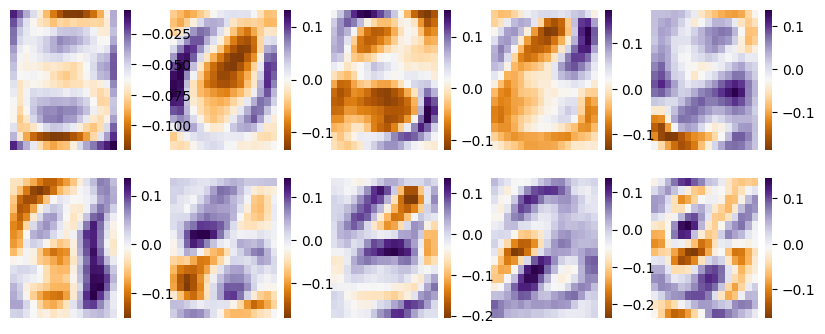

In [64]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
    sns.heatmap(Vt[i].reshape(16, 16), cmap="PuOr", ax=ax)
    ax.axis("off")  
plt.show()


<h5>Reduce the data. The reduced data matrix is computed by multiplying U and S, because is more efficint than multuplying data_numbers_train and V</h5>

In [65]:
#data_numbers_train_reduced = np.dot(data_numbers_train, Vt.T)
#data_numbers_train_reduced = np.dot(U, np.diag(S))
for i in range(U.shape[1]):
    for j in range(U.shape[0]):
        U[j][i] *= S[i]
data_numbers_train_reduced = U

print(data_numbers_train_reduced.shape)

(1200, 150)


<h5>Plot the first 3 principal components. There is a separation between digits, but it's hard to notice it clearly using a small amount of principal components</h5>

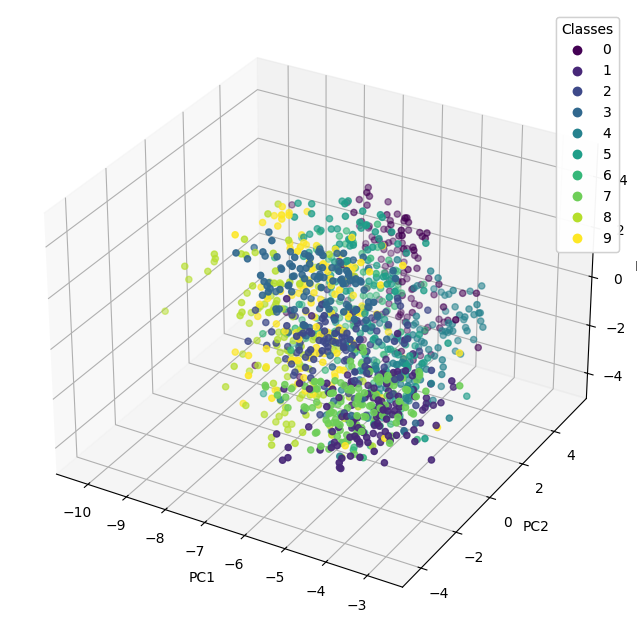

In [66]:

#Plot the first three principal components of the training data in a 3D scatter plot with different colors for each class (digit)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_numbers_train_reduced[:, 0], data_numbers_train_reduced[:, 1], data_numbers_train_reduced[:, 2], c=data_labels_train)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


legend1 = ax.legend(*scatter.legend_elements(num=10), loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()


<h2>Testing</h2>

<h5>A random test iamge is selected from the test data (data_numbers_test)</h5>

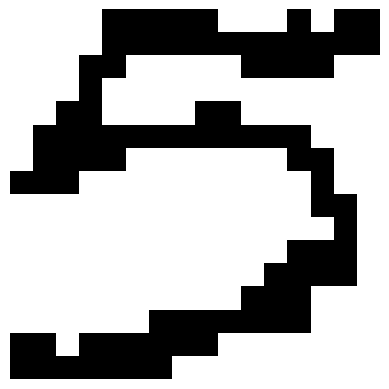

In [67]:
random_idx = random.randint(0, data_numbers_test.shape[0])
test_image = data_numbers_test[random_idx]
plt.imshow(test_image.reshape(16, 16), cmap="binary")
plt.axis("off")
plt.show()

<h5>The test image is projected on the reduced space</h5>
<h5>The projection of the test image is compared with the projections made in the training phase. This has been done using the Euclidean distance between the test image projection and the traing images projections. The smallest distance indicates that the test image projection if found in the cluster of the closest image projection from the training phase.</h5>
<h5>The image is labeled using the label of the closest image found</h5>

Closest image is 6.276745232720666 away from the test image
The test image is a 5


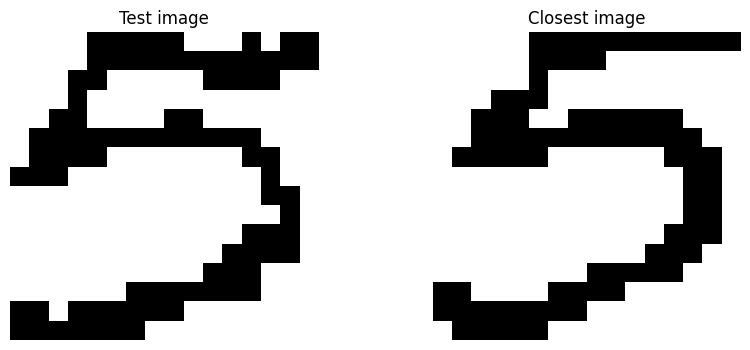

In [68]:
test_image_reduced = np.dot(test_image, Vt.T)

min_dist = np.inf
min_dist_idx = None
for i in range(data_numbers_train_reduced.shape[0]):
    dist = np.linalg.norm(test_image_reduced - data_numbers_train_reduced[i]) #euclidian distance
    if dist < min_dist: #if the distance is smaller than the minimum distance
        min_dist = dist #update the minimum distance
        min_dist_idx = i #update the index of the closest instance
print(f"Closest image is {min_dist} away from the test image")
#the test image is labeled as the label of the closest instance
print(f"The test image is a {data_labels_train[min_dist_idx]}")

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(data_numbers_test[random_idx].reshape(16, 16), cmap="binary")
axs[0].axis("off")
axs[0].set_title("Test image")
axs[1].imshow(data_numbers_train[min_dist_idx].reshape(16, 16), cmap="binary")
axs[1].axis("off")
axs[1].set_title("Closest image")
plt.show()




<h2>Calculate the confusion matrix to test the accuracy of the model</h2>

(300, 150)


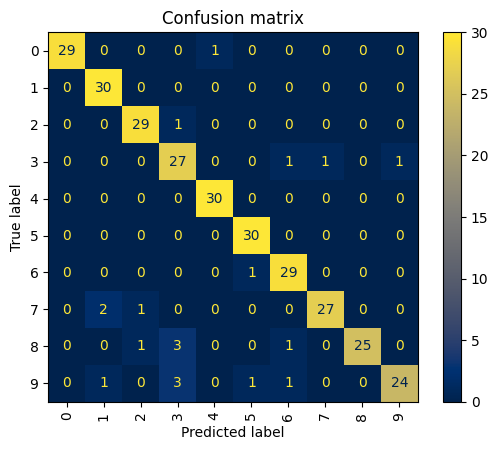

Accuracy: 93.33%


In [69]:
data_numbers_test_reduced = np.dot(data_numbers_test, Vt.T)
print(data_numbers_test_reduced.shape)

#confusion matrix
data_labels_pred = []
for i in range(data_numbers_test_reduced.shape[0]):
    min_dist = np.inf
    min_dist_idx = None
    for j in range(data_numbers_train_reduced.shape[0]):
        dist = np.linalg.norm(data_numbers_test_reduced[i] - data_numbers_train_reduced[j])
        if dist < min_dist:
            min_dist = dist
            min_dist_idx = j
    data_labels_pred.append(data_labels_train[min_dist_idx])

conf_matrix = confusion_matrix(data_labels_test, data_labels_pred)
ConfusionMatrixDisplay(conf_matrix,).plot(cmap="cividis", xticks_rotation="vertical", values_format="d", ax=plt.gca())
plt.title("Confusion matrix")
plt.show()

#accuracy
print(f"Accuracy: {accuracy_score(data_labels_test, data_labels_pred) * 100:.2f}%")